In [1]:
import pandas as pd
df = pd.read_csv('./data/ETCUSDT_15m.csv')
df.head()

,time,open,high,low,close,volume
0,2023-01-01 00:00:00,15.688,15.713,15.630,15.636,91972.05
1,2023-01-01 00:15:00,15.635,15.682,15.628,15.682,60041.83
2,2023-01-01 00:30:00,15.681,15.686,15.610,15.623,73937.39
3,2023-01-01 00:45:00,15.622,15.658,15.619,15.657,35434.75
4,2023-01-01 01:00:00,15.657,15.671,15.635,15.658,46886.82


In [2]:
# df = df.rename(columns={'close': 'Close', 'open': 'Open', 'high': 'High', 'low': 'Low', 'volume': 'Volume'})

In [3]:
import pandas_ta as ta
df["EMA"] = ta.ema(df.close, length=50)
df["RSI"] = ta.rsi(df.close, length=3)
a=ta.adx(df.high, df.low, df.close, length=5)
df['ADX']=a['ADX_5']
df['ATR']= df.ta.atr()
#help(ta.adx)

In [4]:
#dropna
df = df.dropna()
df.head()

,time,open,high,low,close,volume,EMA,RSI,ADX,ATR
49,2023-01-01 12:15:00,15.699,15.705,15.676,15.690,60740.07,15.665620,65.817740,28.842651,0.036723
50,2023-01-01 12:30:00,15.691,15.700,15.678,15.683,18928.34,15.666302,54.728873,32.635544,0.035645
51,2023-01-01 12:45:00,15.683,15.700,15.683,15.690,14555.86,15.667231,63.861666,35.669811,0.034282
52,2023-01-01 13:00:00,15.690,15.716,15.660,15.661,41132.92,15.666987,28.337095,29.383595,0.035867
53,2023-01-01 13:15:00,15.661,15.675,15.645,15.654,28514.98,15.666477,23.586542,28.626302,0.035439


In [5]:
#set time to index

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head()

C:\Users\hiban\AppData\Local\Temp\ipykernel_22880\1852176384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


,open,high,low,close,volume,EMA,RSI,ADX,ATR
time,,,,,,,,,
2023-01-01 12:15:00,15.699,15.705,15.676,15.690,60740.07,15.665620,65.817740,28.842651,0.036723
2023-01-01 12:30:00,15.691,15.700,15.678,15.683,18928.34,15.666302,54.728873,32.635544,0.035645
2023-01-01 12:45:00,15.683,15.700,15.683,15.690,14555.86,15.667231,63.861666,35.669811,0.034282
2023-01-01 13:00:00,15.690,15.716,15.660,15.661,41132.92,15.666987,28.337095,29.383595,0.035867
2023-01-01 13:15:00,15.661,15.675,15.645,15.654,28514.98,15.666477,23.586542,28.626302,0.035439


In [6]:
from directional_change import *
from xabcd import *
from collections import Counter

ext = get_extremes(df, sigma=0.02)
patterns = find_xabcd(df,extremes=ext, err_thresh=0.5)
# patterns.keys()
# temp = patterns['Gartley']['bear_signal']
# Counter(temp)
for idx in patterns.keys():
    bull_signal = patterns[idx]['bull_signal']
    original_bull_signal_count = Counter(bull_signal)
    bear_signal = patterns[idx]['bear_signal']
    original_bear_signal_count = Counter(bear_signal)
    print(f"Pattern: {idx} , bull_signal: {original_bull_signal_count}, bear_signal: {original_bear_signal_count}")
    # put all signals together
    all_signals = bull_signal + bear_signal
    # count the number of each signal
    count = Counter(all_signals)
    print(idx, count)
    df[idx] = all_signals
    print("=====================================")

Pattern: Gartley , bull_signal: Counter({0.0: 26892, 1.0: 1059}), bear_signal: Counter({0.0: 27263, -1.0: 688})
Gartley Counter({0.0: 26204, 1.0: 1059, -1.0: 688})
Pattern: Bat , bull_signal: Counter({0.0: 27844, 1.0: 107}), bear_signal: Counter({0.0: 27837, -1.0: 114})
Bat Counter({0.0: 27730, -1.0: 114, 1.0: 107})
Pattern: Butterfly , bull_signal: Counter({0.0: 27821, 1.0: 130}), bear_signal: Counter({0.0: 27669, -1.0: 282})
Butterfly Counter({0.0: 27539, -1.0: 282, 1.0: 130})
Pattern: Crab , bull_signal: Counter({0.0: 27947, 1.0: 4}), bear_signal: Counter({0.0: 27951})
Crab Counter({0.0: 27947, 1.0: 4})
Pattern: Deep Crab , bull_signal: Counter({0.0: 27935, 1.0: 16}), bear_signal: Counter({0.0: 27870, -1.0: 81})
Deep Crab Counter({0.0: 27854, -1.0: 81, 1.0: 16})
Pattern: Cypher , bull_signal: Counter({0.0: 27840, 1.0: 111}), bear_signal: Counter({0.0: 27468, -1.0: 483})
Cypher Counter({0.0: 27357, -1.0: 483, 1.0: 111})
Pattern: Shark , bull_signal: Counter({0.0: 27919, 1.0: 32}), be

In [7]:
#rename columns
df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [8]:
df['Gartley'].value_counts()

 0.0    26204
 1.0     1059
-1.0      688
Name: Gartley, dtype: int64

In [9]:
from backtesting import Strategy
from backtesting import Backtest

def SIGNAL(df,col_name):
    return df[col_name]

class XABCD_Strategy(Strategy):
    pattern_type = 'Gartley' # [GARTLEY, BAT, BUTTERFLY, CRAB, DEEP_CRAB, CYPHER, SHARK]
    atr_sl_rate = 1.3
    TPSL_rate = 1.5
    trade_limit = 1

    def init(self):
        super().init()
        self.signal = self.I(SIGNAL, self.data, self.pattern_type)

    def next(self):
        super().next()

        # self.signal = self.data[self.pattern_type]

        slatr = self.atr_sl_rate * self.data.ATR[-1]
        if self.signal == 1.0 and len(self.trades)<=self.trade_limit:
            sl_price = self.data.Close[-1] - slatr
            tp_price = self.data.Close[-1] + self.TPSL_rate * slatr
            self.buy(sl=sl_price, tp=tp_price)
        if self.signal == -1.0 and len(self.trades)<=self.trade_limit:
            sl_price = self.data.Close[-1] + slatr
            tp_price = self.data.Close[-1] - self.TPSL_rate * slatr
            self.sell(sl=sl_price, tp=tp_price)

bt = Backtest(df, XABCD_Strategy, cash=50000, commission=.00002, margin=.05)
stat = bt.run()
stat

Start                     2023-01-01 12:15:00
End                       2023-10-19 15:45:00
Duration                    291 days 03:30:00
Exposure Time [%]                    7.692032
Equity Final [$]                    19.966007
Equity Peak [$]                  55814.042938
Return [%]                         -99.960068
Buy & Hold Return [%]               -5.991077
Return (Ann.) [%]                  -99.994355
Volatility (Ann.) [%]                0.949452
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -99.978831
Avg. Drawdown [%]                  -41.656109
Max. Drawdown Duration      284 days 16:45:00
Avg. Drawdown Duration       94 days 23:35:00
# Trades                                  429
Win Rate [%]                        41.958042
Best Trade [%]                       2.593913
Worst Trade [%]                     -2.491639
Avg. Trade [%]                    

In [10]:
%%time
stats = bt.optimize(atr_sl_rate = np.arange(0.5, 2.5, 0.1).tolist(),
                    TPSL_rate = np.arange(0.5, 2.5, 0.1).tolist(),
                    trade_limit = np.arange(0, 2, 1).tolist(),
                    pattern_type = ['Gartley','Bat','Butterfly','Crab','Cypher','Shark'],
                    maximize='Equity Final [$]')
stats

C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 5600 configurations.
  output = _optimize_grid()


  0%|          | 0/19 [00:00<?, ?it/s]

C:\Users\hiban\AppData\Roaming\Python\Python310\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501


RuntimeError: Indicator "SIGNAL(DeepCrab)" errored with exception: 'DeepCrab'

In [ ]:
stats.keys()

Index(['Start', 'End', 'Duration', 'Exposure Time [%]', 'Equity Final [$]',
       'Equity Peak [$]', 'Return [%]', 'Buy & Hold Return [%]',
       'Return (Ann.) [%]', 'Volatility (Ann.) [%]', 'Sharpe Ratio',
       'Sortino Ratio', 'Calmar Ratio', 'Max. Drawdown [%]',
       'Avg. Drawdown [%]', 'Max. Drawdown Duration', 'Avg. Drawdown Duration',
       '# Trades', 'Win Rate [%]', 'Best Trade [%]', 'Worst Trade [%]',
       'Avg. Trade [%]', 'Max. Trade Duration', 'Avg. Trade Duration',
       'Profit Factor', 'Expectancy [%]', 'SQN', '_strategy', '_equity_curve',
       '_trades'],
      dtype='object')

In [ ]:
stats._strategy

<Strategy XABCD_Strategy(atr_sl_rate=0.6,TPSL_rate=1.4,trade_limit=0)>

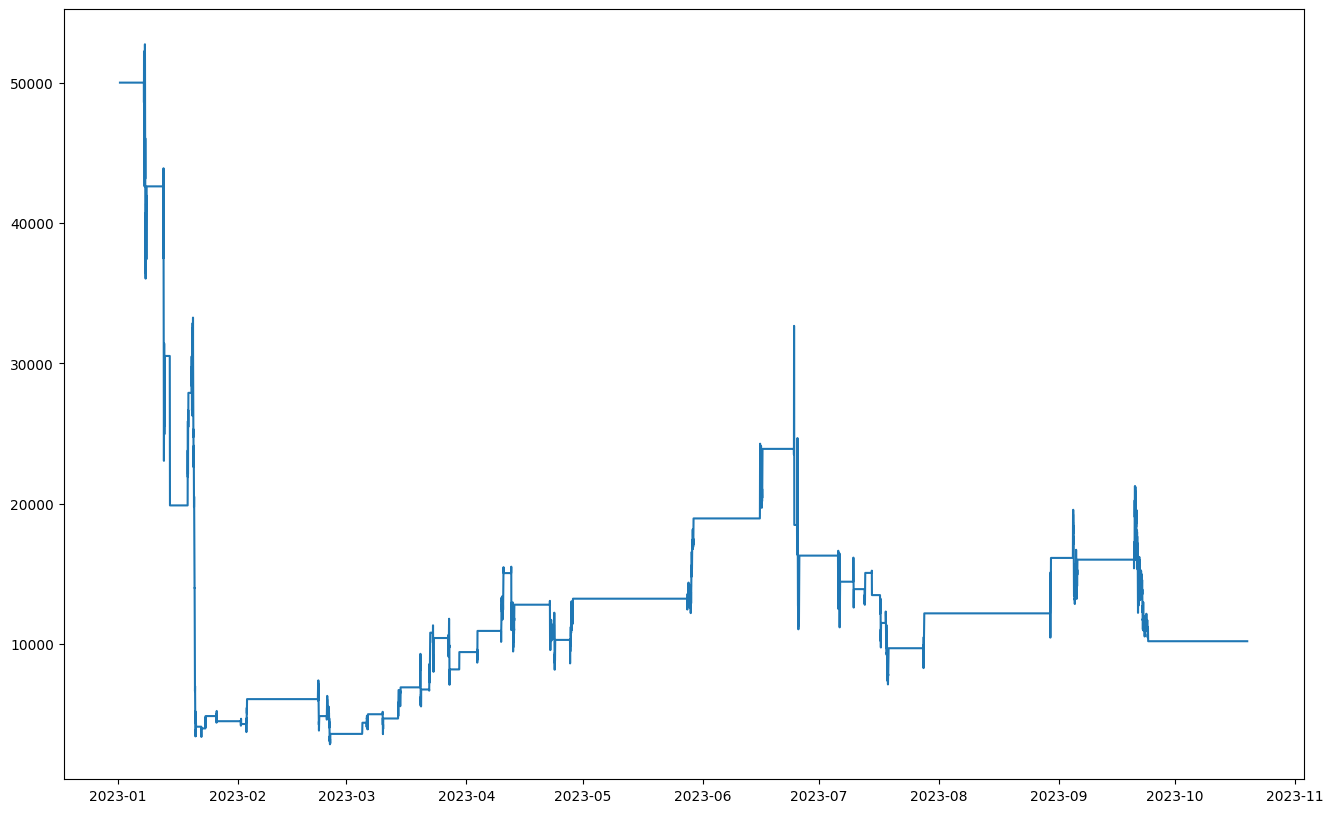

In [ ]:
import matplotlib.pyplot as plt

#stats['_equity_curve']
plt.figure(figsize=(16, 10))
plt.plot(stats['_equity_curve']['Equity'])
plt.show()